<a href="https://colab.research.google.com/github/sandhrabijoy/_/blob/master/Pytorch_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing the necessary libraries
!pip install matplotlib tqdm torchmetrics torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import torchmetrics
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms


In [3]:
#setting device and loading the data
device= torch.device("cuda" if torch.cuda.is_available()else "cpu")
#loading of data
transform=transforms.Compose([transforms.ToTensor(),])
trainset=torchvision.datasets.MNIST(root='./data/',train=True,download=True,transform=transform)
testset=torchvision.datasets.MNIST(root='./data/',train=False, download=True,transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.08MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.16MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
#building dataset class
class MNISTDataset(Dataset):
  def __init__(self,X,y):
    self.X=X.type(torch.cuda.FloatTensor).to(device)
    self.y=nn.functional.one_hot(y).type(torch.cuda.FloatTensor).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    features=self.X[idx]
    target=self.y[idx]

    return features,target

In [5]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)
else:
    print("CUDA is not available. Check your installation.")



CUDA Available: True
CUDA Device Count: 1
CUDA Device Name: Tesla T4
CUDA Version: 12.4


In [6]:
#creating the dataloader
train_dataset=MNISTDataset(trainset.data,trainset.targets)
test_dataset=MNISTDataset(testset.data,testset.targets)

train_loader=DataLoader(train_dataset,shuffle=True,batch_size=32)
test_loader=DataLoader(test_dataset,shuffle=True,batch_size=32)

Feature batch shape:torch.Size([32, 28, 28])
Labels batch shape:torch.Size([32, 10])


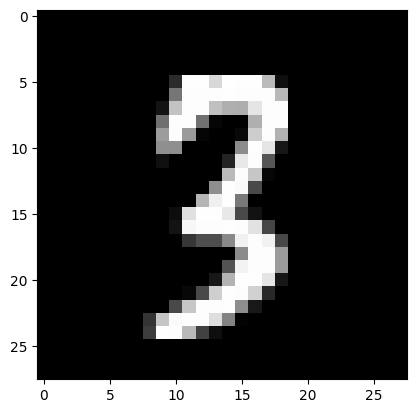

Label:3


In [9]:
#sample print
train_features,train_labels=next(iter(train_loader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.size()}")
img=train_features[0].squeeze().to("cpu")
label=train_labels[0].to("cpu")
plt.imshow(img,cmap="gray")
plt.show()
print(f"Label:{label.argmax().item()}")

In [10]:
#defining the model
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()

    # convolutional layer1
    self.conv1=nn.Conv2d(1,32,3,1)

    #convotlutional layer2
    self.conv2=nn.Conv2d(32,64,3,1)

    #fully connected layer 1
    self.fcl=nn.Linear(1600,1200)

    #fully connected layer 2
    self.fc2=nn.Linear(1200,10)

  def forward(self,x):
    x=self.conv1(x)
    x=nn.functional.relu(x)
    x=nn.functional.max_pool2d(x,2)


    #flatten the output from the convolutional layers
    x=x.view(-1,1600)

    #pass the output from the convolutional layers through the fully connected layers
    x=self.fc1(x)
    x=nn.functional.relu(x)
    x=self.fc2(x)

    #return the output of the fully connected layeres
    return x

In [12]:
model=MyModel().to(device)

In [13]:
#defining the parameters
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
n_epochs=100